统计分析是一个了解数据集中变量间是否关联和如何关联的过程，可视化是这个过程中的核心组件。当数据被恰当地可视化时，人的视觉系统可以看到指示关系的趋势和模式。

我们将在本章讨论三个seaborn函数。我们最常用的是relplot()，这是一个figure-level的函数，可以用散点图和线图两种通用的方法来可视化统计关系。relplot()将FacetGrid 与两个axes-level函数组合在一起:

- scatterplot()(kind="scatter"; 默认值)
- lineplot()(kind="line")

正如我们将要看到的，这些函数可能非常有启发性，因为他们使用简单且易于理解的数据表示形式，且仍然能够表示复杂的数据集结构。之所以可以这样，是因为它们可以通过色调、大小和样式的语义映射最多三个额外的变量来增强绘制的二维图形。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## 用散点图关联变量

散点图是数据可视化的支柱，它通过点云描绘了两个变量的联合分布，其中每个点代表数据集中的一个观测值。这种描述能够使我们通过视觉推断出许多信息，他们之间是否存在任何有意义的关系。

在seaborn中有多种方式绘制散点图。当两个变量的是数值型时，最基本的是函数scatterplot()。在 类别可视化，我们将会看到使用散点图来显示类别数据的专用工具。scatterplot()是relplot()中kind的默认类型(也可以通过kind="scatter"来设置):

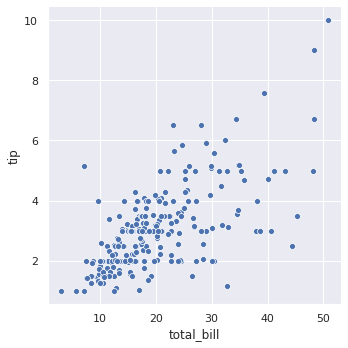

In [2]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

虽然这些点是以二维绘制的，但可以通过根据第三个变量对点进行着色来将另一个维度添加到绘图中。在seaborn中，这被称为使用“色调语义”，因为该点的颜色获得了意义：

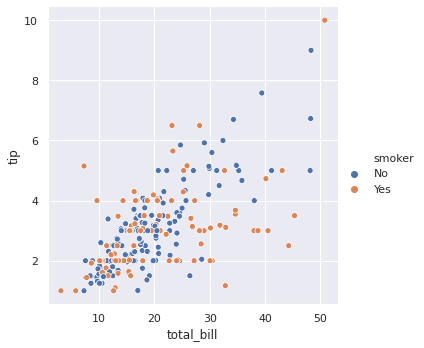

In [3]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

为了强调类别之间的差异并提高可访问性，可以为每个类别使用不同的标记样式

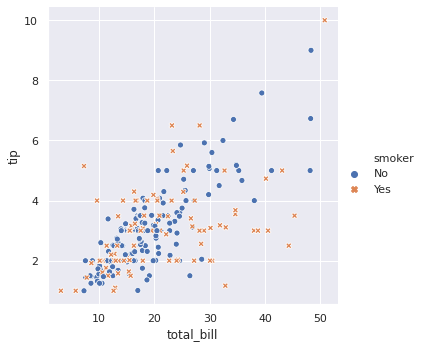

In [4]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

也可以通过单独改变每个点的色调和样式来表示四个变量。但是这应该谨慎，因为眼睛对形状的敏感度远低于对颜色的敏感度

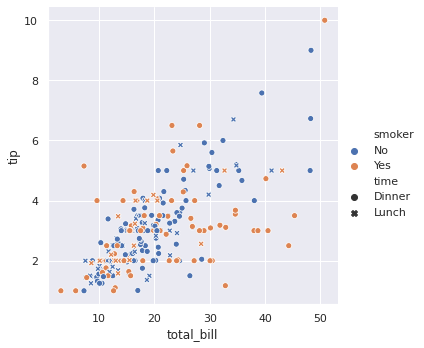

In [5]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

在上面的例子中，色调语义表示类别，所以使用了默认的定性调色板。如果色调语义表示数值(特别是，如果它可以转换为浮点数)，默认的颜色切换到顺序调色板:

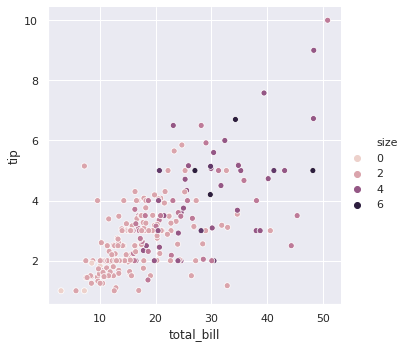

In [6]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

在这两种情况下，您都可以自定义调色板，有多种方式可以实现。在这里，我们使用cubehelix_palette()的字符串接口自定义一个顺序调色板:

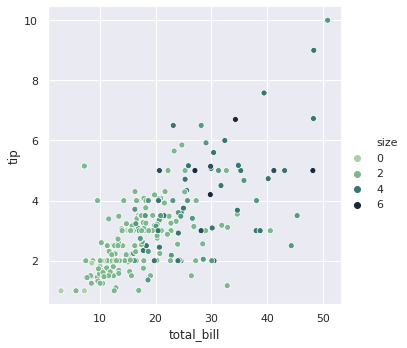

In [7]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

第三个语义变量改变每个点的大小

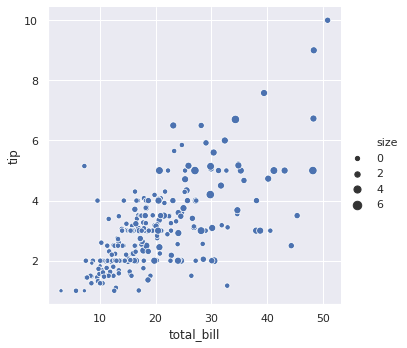

In [8]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

与matplotlib.pyplot.scatter()不同，变量的值不用于直接决定点的面积。数据单位中的值范围被规范化为面积单位的范围，这个范围可以自定义:

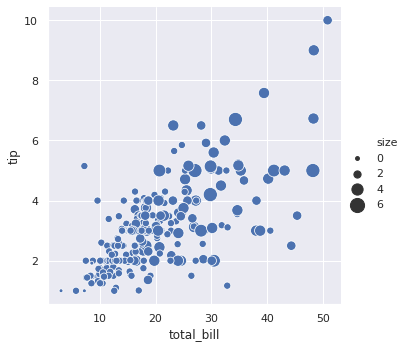

In [9]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

在scatterplot()API示例中展示了更多如何通过自定义使用不同语义来显示统计关系的示例。

## 强调线图的连续性

散点图是非常有效的，但是没有通用的最优可视化类型。相反，可视表示应该适应数据集的细节以及您试图用图表回答的问题。

对于某些数据集，您可能希望了解一个变量中的变化关于时间的函数，或者类似的连续变量。在这种情况下，一个很好的选择是绘制线图。 在seaborn中，这可以通过lineplot()函数直接实现，也可以通过设置relplot()的参数kind="line"来实现:

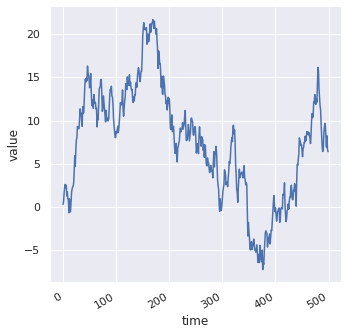

In [10]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

由于lineplot()假设您想要将y绘制为x的函数，默认行为是在绘制之前按数字x对数据进行排序。但是，这可以被禁用：

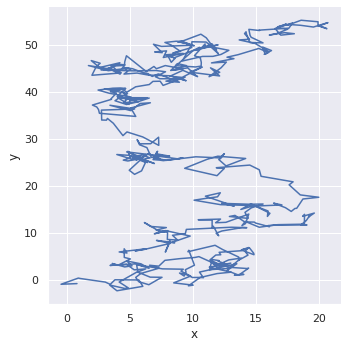

In [13]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

## 聚合和表示不确定性

更复杂的数据集将对x变量的相同值有多个观测值。seaborn的默认行为是通过绘制平均值及95%的置信区间，在每个x周围聚合多个测量值:

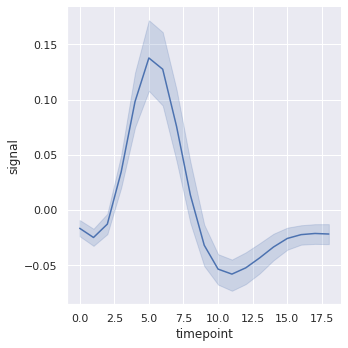

In [15]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

置信区间是使用bootstrapping计算的，对于较大的数据集，它可能是时间密集型的。因此，可以禁用它们:

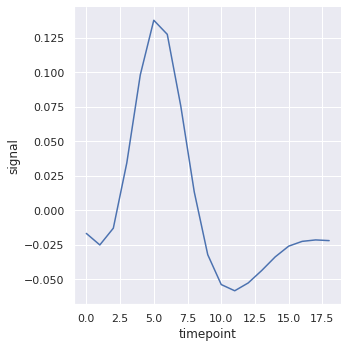

In [16]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

尤其是对于较大的数据，另一个不错的选择是通过绘制**标准差**，而不是置信区间来表示分布在每个时间点的分布范围:

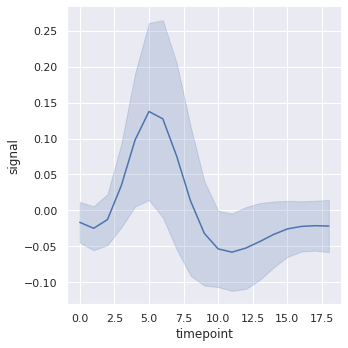

In [17]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

可以通过设置estimator参数为None，来完全停用聚合。当数据在每个点上有多个观察值时，这可能会产生奇怪的效果。

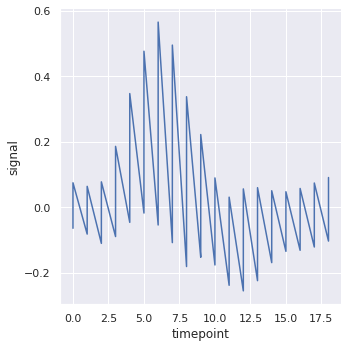

In [18]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

## 使用语义映射

函数lineplot()与scatterplot()具有相同的灵活性：它可以通过修改绘图元素的色调，大小和样式来显示最多三个附加变量。它使用于scatterplot()相同的API，这意味着我们不需要停下来考虑控制matplotlib中线条与点外观的参数。

在lineplot()中使用语义也将决定数据的聚合方式。例如，添加具有两个级别的色调语义将绘图分成两行以及错误带，每个都着色以指示它们对应于哪个数据集。

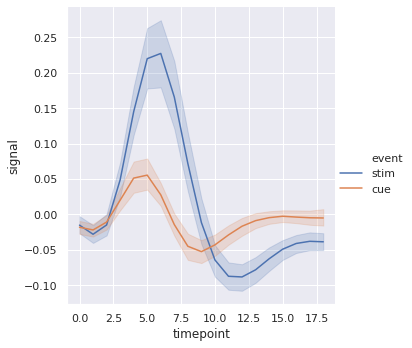

In [19]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

在线条图中添加样式语义默认情况下会改变线条中的破折号模式：

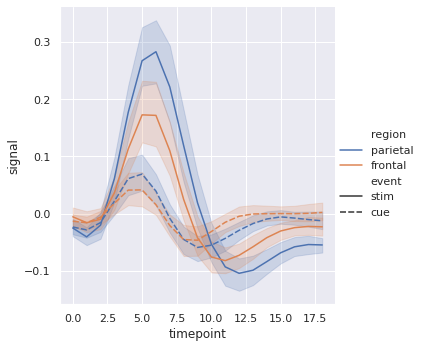

In [20]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);

但您可以通过观察每次使用时的标记识别子集，或者使用短划线或代替它们：

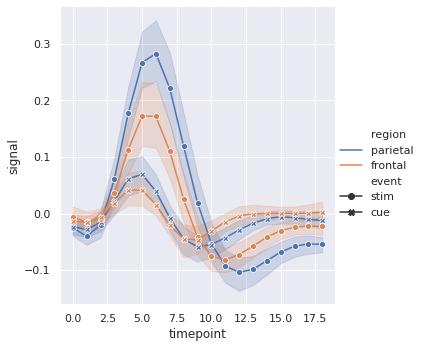

In [21]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

与散点图一样，要谨慎使用多个语义制作线图。虽然有时提供信息，但它们也很难解析和解释。但当您只检查一个附加变量的变化时，更改线条的颜色和样式也很有用。当打印成黑白或有色盲的人观看时，这可以使绘图更容易访问：

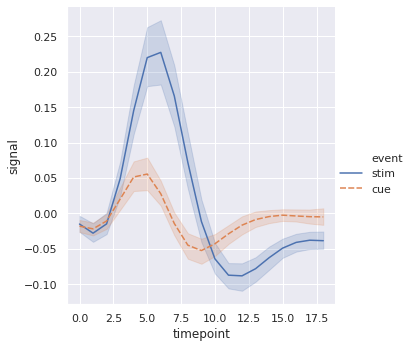

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);

当您使用重复测量数据（即，您有多次采样的单位）时，您还可以单独绘制每个采样单位，而无需通过语义区分它们。这样可以避免使图例混乱：

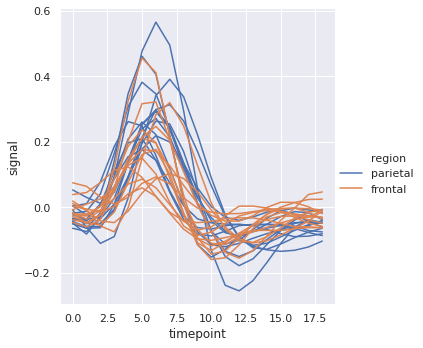

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

In [24]:
fmri.query("event == 'stim'")

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
527,s8,18,stim,frontal,-0.011114
528,s6,18,stim,frontal,0.046500
529,s5,18,stim,frontal,-0.031013
530,s4,18,stim,frontal,-0.063263


lineplot()中默认的色彩映射和图例的处理还取决于色调语义是类别还是数值：

In [26]:
dots = sns.load_dataset("dots").query("align == 'dots'")
dots

,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487
...,...,...,...,...,...
389,dots,T2,680,3.2,37.806267
390,dots,T2,700,0.0,43.464959
391,dots,T2,700,3.2,38.994559
392,dots,T2,720,0.0,41.987121


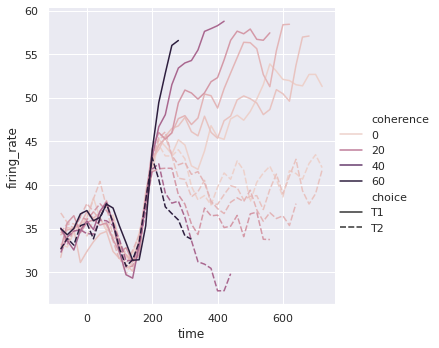

In [27]:
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

可能会发生这样的情况：即使hue变量是数值，它也很难用线性色标表示。如下示例，其中hue变量的级别以对数方式缩放。您可以通过传递列表或字典为每一行提供特定的颜色值

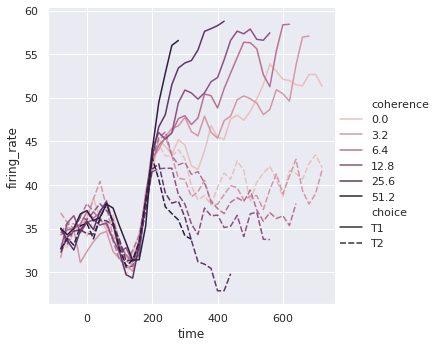

In [28]:
palette = sns.cubehelix_palette(light=.8, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            palette=palette,
            kind="line", data=dots);

或者您可以更改色彩映射的规范化方式

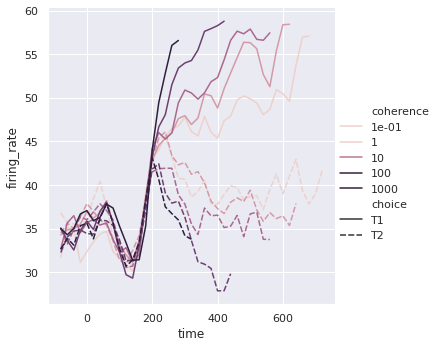

In [29]:
from matplotlib.colors import LogNorm
palette = sns.cubehelix_palette(light=.7, n_colors=6)
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            hue_norm=LogNorm(),
            kind="line", data=dots);

第三个语义，size改变线的宽度

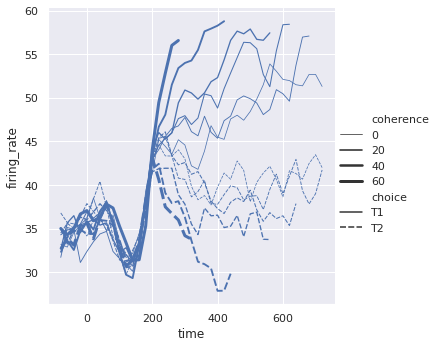

In [30]:
sns.relplot(x="time", y="firing_rate",
            size="coherence", style="choice",
            kind="line", data=dots);

虽然size变量通常是数值型的，但是也可以用线宽映射为类别变量。在这样做的时候要小心，因为除了“粗”线和“细”线之外，很难区分更多。然而，当线具有高频变异性时，破折号很难被察觉，因此在这种情况下，使用不同的宽度可能更有效:

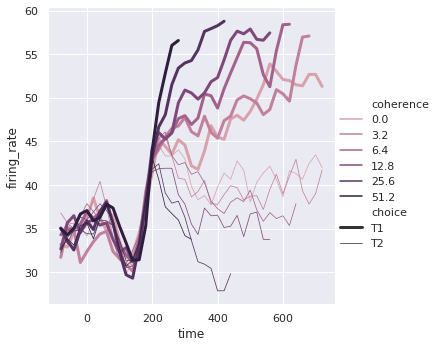

In [31]:
sns.relplot(x="time", y="firing_rate",
           hue="coherence", size="choice",
           palette=palette,
           kind="line", data=dots);

## 用日期数据绘图

线图通常用于可视化与实际日期和时间相关的数据。这些函数以原始格式将数据传递给底层的matplotlib函数，因此他们可以利用matplotlib在tick标签中设置日期格式的功能。但是所有这些格式化都必须在matplotlib层进行，您应该参考matplotlib文档来了解它是如何工作的：

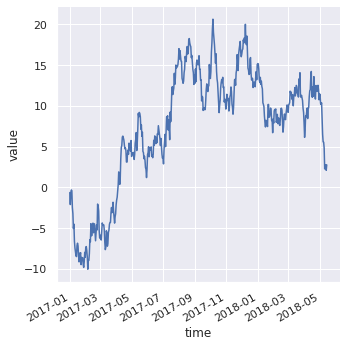

In [32]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## 显示与切面的多种关系

我们在本教程中强调，虽然这些函数可以同时显示几个语义变量，但这样做并不总是有效的。但是，当你想要了解两个变量之间的关系如何依赖于多个其他变量时呢？

最好的方法可能是多次绘制。因为relplot()基于FacetGrid，所以这很容易做到。要显示附加变量的影响，而不是将其分配给图中的一个语义角色，而是使用它来“切面”可视化。这意味着您可以创建多个轴并在每个轴上绘制数据的子集:

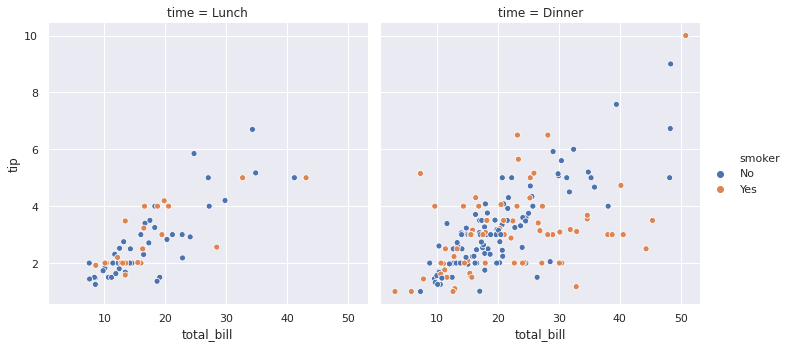

In [33]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

您还可以通过这种方式显示两个变量的影响：一个是通过在列上切面而另一个是在行上切面。当您开始向网格添加更多变量时，您可能希望减小图形大小。请记住，大小FacetGrid由每个切面的高度和长宽比参数化的：

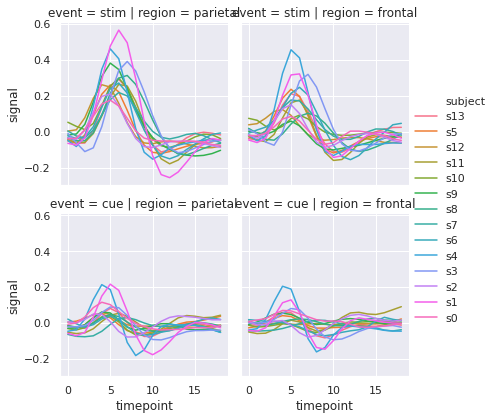

In [34]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

当您想要检查一个变量的多个级别的效果时，在列上对该变量进行切面处理，然后将切面“包装”到行中:

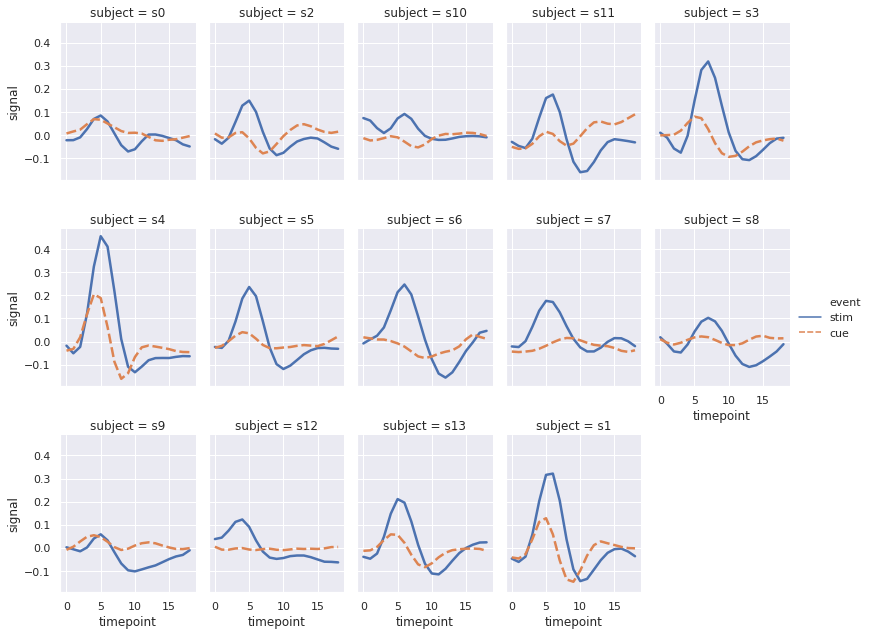

In [35]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

这些可视化通常被称为格点图，它们非常有效，因为它们以总体模式和与这些模式的偏差的数据格式来呈现数据，便于眼睛观察。虽然你应该利用scatterplot()和relplot()提供的灵活性，但一定要记住，几个简单的图通常比一个复杂的图更有效。